## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
import numpy as np
def preproc_x(x, flatten=True):
    x = (x - np.mean(x)) / (x.max() - x.min())
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               1651

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 244us/step - loss: 1.6961 - accuracy: 0.3947 - val_loss: 1.5322 - val_accuracy: 0.4633
Epoch 2/100
50000/50000 [==============================] - 12s 247us/step - loss: 1.4562 - accuracy: 0.4826 - val_loss: 1.4423 - val_accuracy: 0.4938
Epoch 3/100
50000/50000 [==============================] - 13s 256us/step - loss: 1.3356 - accuracy: 0.5285 - val_loss: 1.4151 - val_accuracy: 0.4997
Epoch 4/100
50000/50000 [==============================] - 13s 256us/step - loss: 1.2359 - accuracy: 0.5652 - val_loss: 1.3888 - val_accuracy: 0.5113
Epoch 5/100
50000/50000 [==============================] - 13s 261us/step - loss: 1.1548 - accuracy: 0.5918 - val_loss: 1.3326 - val_accuracy: 0.5320
Epoch 6/100
50000/50000 [==============================] - 13s 253us/step - loss: 1.0756 - accuracy: 0.6170 - val_loss: 1.3407 - val_accuracy: 0.5325
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 15s 290us/step - loss: 0.0993 - accuracy: 0.9665 - val_loss: 3.5151 - val_accuracy: 0.5319
Epoch 56/100
50000/50000 [==============================] - 14s 283us/step - loss: 0.1027 - accuracy: 0.9666 - val_loss: 3.5829 - val_accuracy: 0.5394
Epoch 57/100
50000/50000 [==============================] - 15s 295us/step - loss: 0.1122 - accuracy: 0.9619 - val_loss: 3.7125 - val_accuracy: 0.5301
Epoch 58/100
50000/50000 [==============================] - 14s 287us/step - loss: 0.0914 - accuracy: 0.9688 - val_loss: 3.6406 - val_accuracy: 0.5279
Epoch 59/100
50000/50000 [==============================] - 15s 302us/step - loss: 0.0920 - accuracy: 0.9695 - val_loss: 3.5405 - val_accuracy: 0.5329
Epoch 60/100
50000/50000 [==============================] - 14s 286us/step - loss: 0.0842 - accuracy: 0.9720 - val_loss: 3.6966 - val_accuracy: 0.5294
Epoch 61/100
50000/50000 [==============================] - 15s 292us/step - loss: 0.1061 - ac

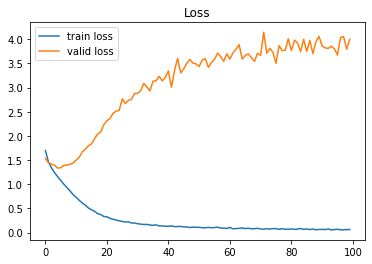

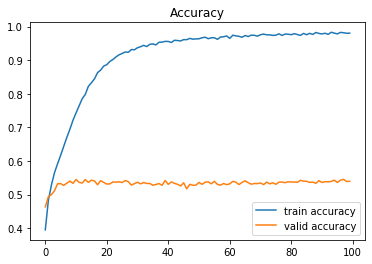

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()